In [1]:
import numpy as np

In [2]:
class Profile:
    def __init__ (self, face_discriptors, name): 
        self.face_descriptors = face_discriptors
        self.name = name
    @property
    def properties(self):
        return (self.name, self.face_descriptors) 

In [3]:
def cosine_distances(X, Y):
    """
    Compute the cosine distance between each row of X and Y.
    """
    if(len(X.shape) > 1):
        X = np.average(X, axis=0)
    if(len(Y.shape) > 1):
        Y = np.average(Y, axis=0)
    
    return (1 - (np.dot(X, Y) / (np.linalg.norm(X) * np.linalg.norm(Y))))

In [4]:
import networkx as nx
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


class Node:
    """ Describes a node in a graph, and the edges connected
        to that node."""

    def __init__(self, ID, neighbors, descriptor, truth=None, file_path=None):
        """
        Parameters
        ----------
        ID : int
            A unique identifier for this node. Should be a
            value in [0, N-1], if there are N nodes in total.

        neighbors : Sequence[int]
            The node-IDs of the neighbors of this node.

        descriptor : numpy.ndarray
            The shape-(512,) descriptor vector for the face that this node corresponds to.

        truth : Optional[str]
            If you have truth data, for checking your clustering algorithm,
            you can include the label to check your clusters at the end.
            If this node corresponds to a picture of Ryan, this truth
            value can just be "Ryan"

        file_path : Optional[str]
            The file path of the image corresponding to this node, so
            that you can sort the photos after you run your clustering
            algorithm
        """
        self.id = ID  # a unique identified for this node - this should never change

        # The node's label is initialized with the node's ID value at first,
        # this label is then updated during the whispers algorithm
        self.label = ID

        # (n1_ID, n2_ID, ...)
        # The IDs of this nodes neighbors. Empty if no neighbors
        self.neighbors = tuple(neighbors)
        self.descriptor = descriptor

        self.truth = truth
        self.file_path = file_path


    def plot_graph(graph, adj):
        """ Use the package networkx to produce a diagrammatic plot of the graph, with
        the nodes in the graph colored according to their current labels.
        Note that only 20 unique colors are available for the current color map,
        so common colors across nodes may be coincidental.
        Parameters
        ----------
        graph : Tuple[Node, ...]
            The graph to plot. This is simple a tuple of the nodes in the graph.
            Each element should be an instance of the `Node`-class.

        adj : numpy.ndarray, shape=(N, N)
            The adjacency-matrix for the graph. Nonzero entries indicate
            the presence of edges.

        Returns
        -------
        Tuple[matplotlib.fig.Fig, matplotlib.axis.Axes]
            The figure and axes for the plot."""

        g = nx.Graph()
        for n, node in enumerate(graph):
            g.add_node(n)

        # construct a network-x graph from the adjacency matrix: a non-zero entry at adj[i, j]
        # indicates that an egde is present between Node-i and Node-j. Because the edges are
        # undirected, the adjacency matrix must be symmetric, thus we only look ate the triangular
        # upper-half of the entries to avoid adding redundant nodes/edges
        g.add_edges_from(zip(*np.where(np.triu(adj) > 0)))

        # we want to visualize our graph of nodes and edges; to give the graph a spatial representation,
        # we treat each node as a point in 2D space, and edges like compressed springs. We simulate
        # all of these springs decompressing (relaxing) to naturally space out the nodes of the graph
        # this will hopefully give us a sensible (x, y) for each node, so that our graph is given
        # a reasonable visual depiction
        pos = nx.spring_layout(g)

        # make a mapping that maps: node-lab -> color, for each unique label in the graph
        color = list(iter(cm.tab20b(np.linspace(0, 1, len(set(i.label for i in graph))))))
        color_map = dict(zip(sorted(set(i.label for i in graph)), color))
        colors = [color_map[i.label] for i in graph]  # the color for each node in the graph, according to the node's label

        # render the visualization of the graph, with the nodes colored based on their labels!
        fig, ax = plt.subplots()
        nx.draw_networkx_nodes(g, pos=pos, ax=ax, nodelist=range(len(graph)), node_color=colors)
        nx.draw_networkx_edges(g, pos, ax=ax, edgelist=g.edges())
        return fig, ax

In [5]:
test1 = np.array([[3, 2, 1, 5]])
test2 = np.array([30, 20, -1, 5])
print(cosine_distances(test1, test2))

0.32280045866804197


In [6]:
def neighbors(dv, other, labels):
    neighbors = []
    for i in range(len(other)):
        
        distance = cosine_distances(dv, other[i])
        
        if (0 < distance <= 0.6):
            neighbors.append(labels[i])
        
            
    return np.array(neighbors)

def labels(dvs):
    labels = []
    count = 0
    for dv in dvs:
        labels.append(count)
        count += 1
        
    return labels



In [18]:
from Descriptors import descriptors_from_filestack
from Descriptors import descriptors_from_file
filepaths = [r"C:\Users\BWSI-Student\Downloads\holland_1.jpg", r"C:\Users\BWSI-Student\Downloads\holland_2.jpg", r"C:\Users\BWSI-Student\Downloads\holland_3.jpg", r"C:\Users\BWSI-Student\Downloads\holland_5.jpg", r"C:\Users\BWSI-Student\Downloads\kyrogious_7.jpg"]# r"C:\Users\BWSI-Student\Downloads\kyrogious_8.jpg"]
dvs = descriptors_from_filestack(filepaths)

In [19]:
lbls = labels(dvs)        
nodes = []

node0 = Node(lbls[0], neighbors(dvs[0], dvs, lbls), dvs[0], file_path= filepaths[0])
node1 = Node(lbls[1], neighbors(dvs[1], dvs, lbls), dvs[1], file_path= filepaths[1])
node2 = Node(lbls[2], neighbors(dvs[2], dvs, lbls), dvs[2], file_path= filepaths[2])
node3 = Node(lbls[3], neighbors(dvs[3], dvs, lbls), dvs[3], file_path= filepaths[3])
node4 = Node(lbls[4], neighbors(dvs[4], dvs, lbls), dvs[4], file_path= filepaths[4])
#node5 = Node(lbls[5], neighbors(dvs[5], dvs, lbls), dvs[5], file_path= filepaths[5])


nodes.append(node0)
nodes.append(node1)
nodes.append(node2)
nodes.append(node3)
nodes.append(node4)
#nodes.append(node5)

print(node0.neighbors)
print(node1.neighbors)
print(node2.neighbors)
print(node3.neighbors)
print(node4.neighbors)
#print(node5.neighbors)

(1, 2, 3)
(0, 3)
(0, 3)
(0, 1, 2)
()


In [20]:
def make_adj_unweighted(nodes):
    adj_matrix = np.zeros((len(nodes), len(nodes)))
    for i in range(len(nodes)):
        adj_matrix[i, nodes[i].neighbors] = 1

    return adj_matrix

make_adj_unweighted(nodes)

array([[0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [21]:
def make_adj_weighted(nodes):
    adj_matrix = np.zeros((len(nodes), len(nodes)))
    for i in range(len(nodes)):
        for neighbr in nodes[i].neighbors: 
            adj_matrix[i, neighbr] = 1/(cosine_distances(nodes[i].descriptor, nodes[neighbr].descriptor) ** 2)

    return adj_matrix

make_adj_weighted(nodes)

array([[ 0.        , 16.0577655 ,  2.81023528,  6.9735807 ,  0.        ],
       [16.0577655 ,  0.        ,  0.        ,  7.88987334,  0.        ],
       [ 2.81023528,  0.        ,  0.        ,  4.0584864 ,  0.        ],
       [ 6.9735807 ,  7.88987334,  4.0584864 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [22]:
import random

def run_whispers(rand_nodes, adj_matrix):
    Node.plot_graph(nodes, adj_matrix)
    for _ in range(100):
        current = random.choice(rand_nodes)
        whispers(rand_nodes, current, current.neighbors, adj_matrix)
        
    Node.plot_graph(nodes, adj_matrix) 

    
def whispers(rand_nodes, node, neighbors, adj_matrix):
    m = 0
    index = -1
    for neighbor in node.neighbors:
        if (m < adj_matrix[node.id, neighbor]):
            m = adj_matrix[node.id, neighbor]
            index = neighbor
    
    if (index != -1):
        node.label = rand_nodes[index].label

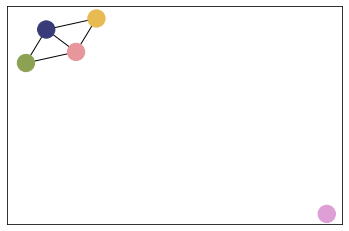

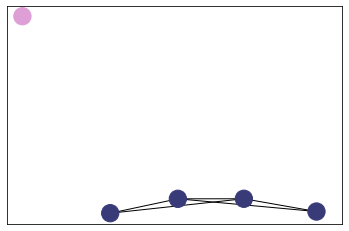

In [23]:
run_whispers(nodes, make_adj_weighted(nodes))